___
# Ciência dos Dados - PROJETO 1

## Pedro Henrique Greco Lopes

___

## Qual método de conexão é predominante nas areas rural e urbana em cada região do país?

___
## Introdução

Este projeto pretende analisar que tipo de conexão à internet é predominante, tanto na região urbana como na rural; e se houve alguma mudança ao longo dos anos no tipo de acesso.


___
## Análise e Resultados


In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from numpy import arange

In [3]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\pedro\Desktop\2 Semestre\Ciência dos Dados


In [4]:
dados = pd.read_csv('DOM2015.csv',sep=',')

In [5]:
#3g ou 4g
dados.V02424 = dados.V02424.astype('category')
dados.V02424.cat.categories = ('Sim','Nao')

#Conex. Discada
dados.V02425 = dados.V02425.astype('category')
dados.V02425.cat.categories = ('Sim','Nao')

#Banda Larga
dados.V02426 = dados.V02426.astype('category')
dados.V02426.cat.categories = ('Sim','Nao')

#Regiao
dados.loc[(dados.V4105<4),'ZONA'] = 'Urbana'
dados.loc[(dados.V4105>3),'ZONA'] = 'Rural'
dados.ZONA = dados.ZONA.astype('category')

#Renda

#Regiao2
dados.loc[(dados.UF==35) | (dados.UF==31) | (dados.UF==32) | (dados.UF==33),'Regiao'] = 'Sudeste'
dados.loc[(dados.UF==42) | (dados.UF==41) | (dados.UF==43),'Regiao'] = 'Sul'
dados.loc[(dados.UF==50) | (dados.UF==51) | (dados.UF==52) | (dados.UF==53),'Regiao'] = 'Cento-Oeste'
dados.loc[(dados.UF==11) | (dados.UF==12) | (dados.UF==13) | (dados.UF==14) | (dados.UF==15) | (dados.UF==16) | (dados.UF==17),'Regiao'] = 'Norte'
dados.loc[(dados.UF==29) | (dados.UF==28) | (dados.UF==27) | (dados.UF==26) | (dados.UF==25) | (dados.UF==24) | (dados.UF==21) | (dados.UF==22) | (dados.UF==23),'Regiao'] = 'Nordeste'
dados.Regiao = dados.Regiao.astype('category')

dados=dados.rename(columns={'V02424':'TresGQuatroG'})
dados=dados.rename(columns={'V02425':'ConexDiscada'})
dados=dados.rename(columns={'V02426':'BandaLarga'})
dados=dados.rename(columns={'V4621':'Renda'})
dados = dados[(dados.Renda!=999999999999)&(dados.Renda<=9000)]

dados=dados.loc[:,['Regiao','ZONA','TresGQuatroG','ConexDiscada','BandaLarga','Renda']]
dados


,Regiao,ZONA,TresGQuatroG,ConexDiscada,BandaLarga,Renda
0,Norte,Urbana,NaN,NaN,NaN,800.0
2,Norte,Urbana,Sim,Nao,Sim,1150.0
3,Norte,Urbana,Sim,Nao,Sim,793.0
4,Norte,Urbana,NaN,NaN,NaN,2900.0
5,Norte,Urbana,Nao,Nao,Sim,1990.0
6,Norte,Urbana,NaN,NaN,NaN,350.0
7,Norte,Urbana,NaN,NaN,NaN,1333.0
8,Norte,Urbana,Sim,Nao,Sim,818.0
10,Norte,Urbana,Sim,Nao,Sim,1716.0
11,Norte,Urbana,Sim,Nao,Sim,2500.0


In [6]:
ct1 = (pd.crosstab(dados.ZONA[dados.Regiao=='Sudeste'],dados.TresGQuatroG, margins=True, rownames=['Zona'], colnames=['Discada'], normalize='index')*100).round(decimals=1)
ct1

Discada,Sim,Nao
Zona,,
Rural,69.4,30.6
Urbana,73.1,26.9
All,73.0,27.0


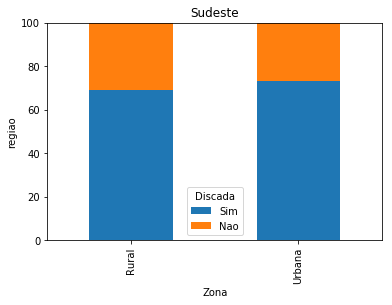

In [7]:
plot = ct1.iloc[0:2,].plot(kind='bar', stacked=True,title='Sudeste')
plot.set_ylim([0, 100])
plt.ylabel('regiao')
plt.show()

In [8]:
ct2 = (pd.crosstab(dados.ZONA[dados.Regiao=='Sul'],dados.TresGQuatroG, margins=True, rownames=['Zona'], colnames=['Discada'], normalize='index')*100).round(decimals=1)
ct2

Discada,Sim,Nao
Zona,,
Rural,56.0,44.0
Urbana,61.4,38.6
All,61.1,38.9


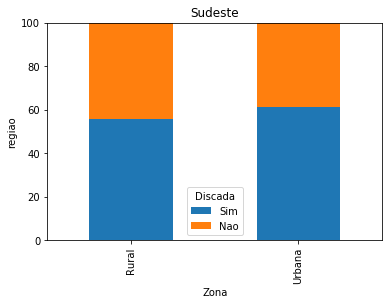

In [9]:
plot = ct2.iloc[0:2,].plot(kind='bar', stacked=True,title='Sudeste')
plot.set_ylim([0, 100])
plt.ylabel('regiao')
plt.show()

In [10]:
ct3 = (pd.crosstab(dados.ZONA[dados.Regiao=='Cento-Oeste'],dados.TresGQuatroG, margins=True, rownames=['Zona'], colnames=['Discada'], normalize='index')*100).round(decimals=1)
ct3

Discada,Sim,Nao
Zona,,
Rural,66.4,33.6
Urbana,73.8,26.2
All,73.5,26.5


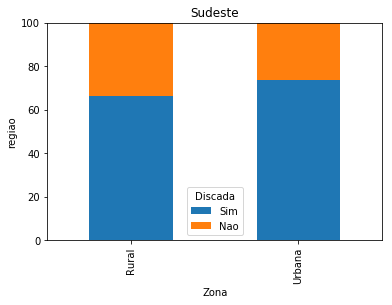

In [11]:
plot = ct3.iloc[0:2,].plot(kind='bar', stacked=True,title='Sudeste')
plot.set_ylim([0, 100])
plt.ylabel('regiao')
plt.show()

In [12]:
ct4 = (pd.crosstab(dados.ZONA[dados.Regiao=='Nordeste'],dados.TresGQuatroG, margins=True, rownames=['Zona'], colnames=['Discada'], normalize='index')*100).round(decimals=1)
ct4

Discada,Sim,Nao
Zona,,
Rural,71.1,28.9
Urbana,67.7,32.3
All,68.0,32.0


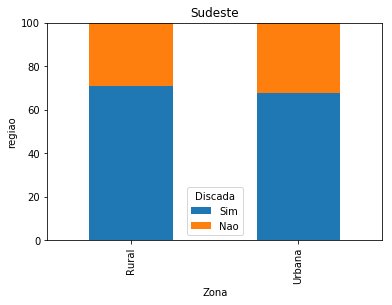

In [13]:
plot = ct4.iloc[0:2,].plot(kind='bar', stacked=True,title='Sudeste')
plot.set_ylim([0, 100])
plt.ylabel('regiao')
plt.show()

In [14]:
ct5 = (pd.crosstab(dados.ZONA[dados.Regiao=='Norte'],dados.TresGQuatroG, margins=True, rownames=['Zona'], colnames=['Discada'], normalize='index')*100).round(decimals=1)
ct5

Discada,Sim,Nao
Zona,,
Rural,77.9,22.1
Urbana,82.7,17.3
All,82.4,17.6


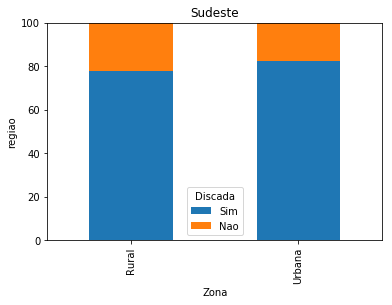

In [15]:
plot = ct5.iloc[0:2,].plot(kind='bar', stacked=True,title='Sudeste')
plot.set_ylim([0, 100])
plt.ylabel('regiao')
plt.show()

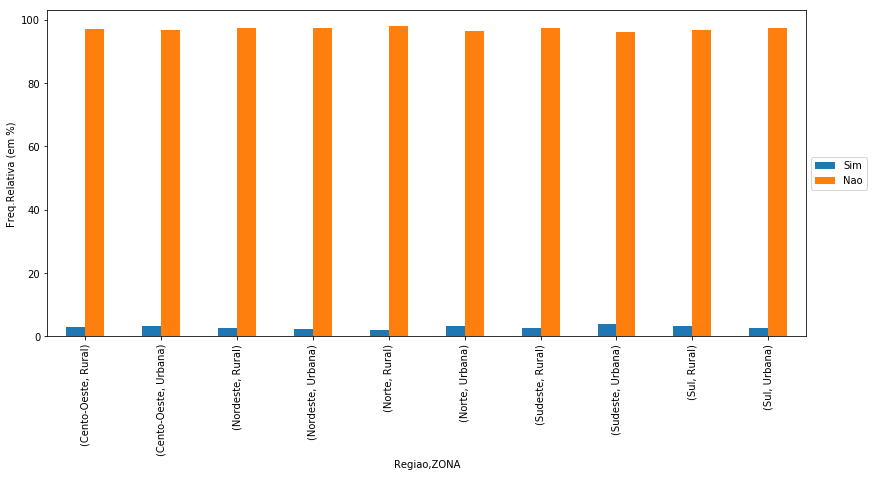

In [16]:
ct10=(pd.crosstab([dados.Regiao, dados.ZONA],dados.ConexDiscada, normalize='index')*100).round(decimals=1)
ct10
plot = ct10.plot(kind='bar',figsize=(17,6))
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Freq.Relativa (em %)')
plt.show()

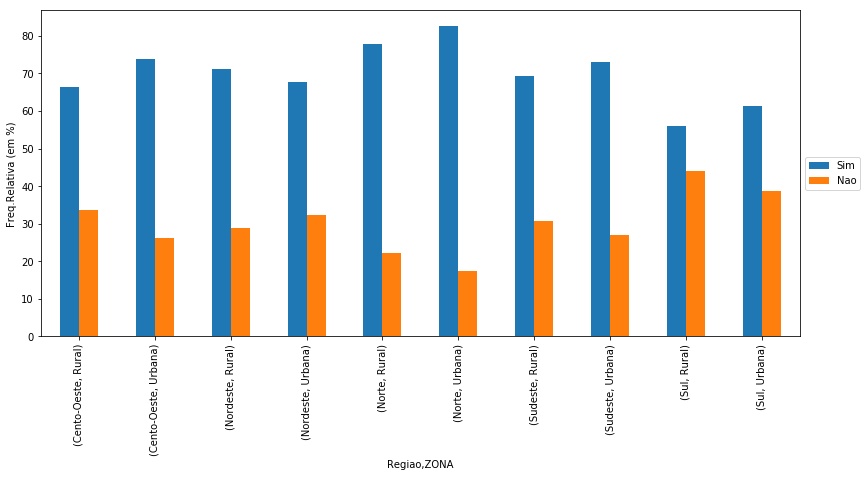

In [17]:

ct9=(pd.crosstab([dados.Regiao, dados.ZONA],dados.TresGQuatroG, normalize='index')*100).round(decimals=1)
ct9
plot = ct9.plot(kind='bar',figsize=(17,6))
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Freq.Relativa (em %)')
plt.show()

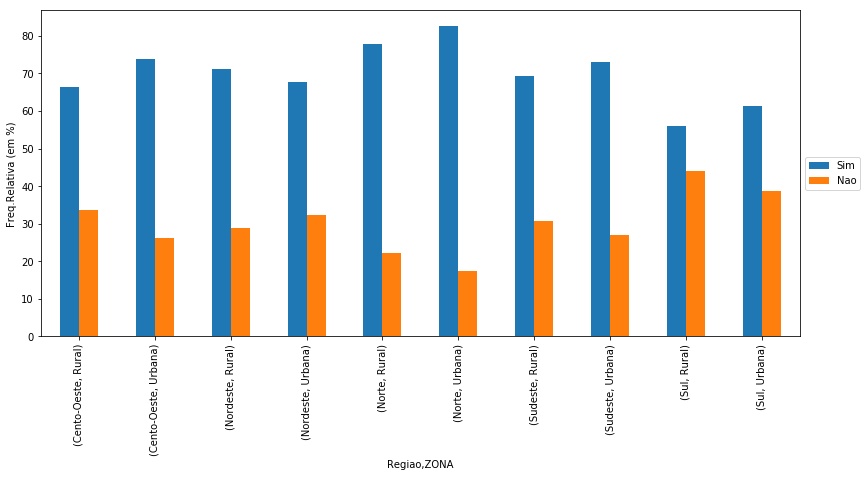

In [18]:
ct10=(pd.crosstab([dados.Regiao, dados.ZONA],dados.BandaLarga, normalize='index')*100).round(decimals=1)
ct10
plot = ct9.plot(kind='bar',figsize=(17,6))
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Freq.Relativa (em %)')
plt.show()

In [177]:
# classes de renda

faixa = arange(0,9000,930)

r = pd.cut(dados.Renda, bins=faixa, right=False)
print('Frequências relativas:')
ut1 = (r.value_counts(sort=False, normalize=True)*100).round(decimals=10)
print(ut1,'\n')

Frequências relativas:
[0, 930)        61.849974
[930, 1860)     23.980141
[1860, 2790)     6.799933
[2790, 3720)     3.110142
[3720, 4650)     1.652263
[4650, 5580)     1.100633
[5580, 6510)     0.683846
[6510, 7440)     0.432548
[7440, 8370)     0.390519
Name: Renda, dtype: float64 



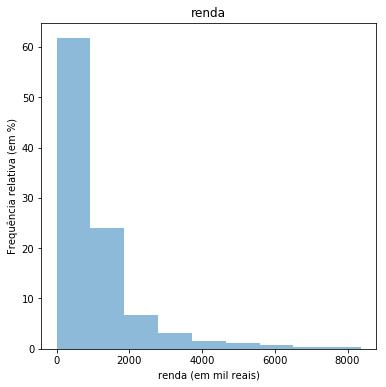

In [181]:
# Gráfico de colunas
from numpy import zeros_like
plot = dados.Renda.plot.hist(bins=faixa,title='renda', weights=zeros_like(dados.Renda)+1./dados.Renda.size*100, figsize=(6, 6), alpha=0.5)
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda (em mil reais)')
plt.show()

___
## Conclusão 

Descreva aqui suas conclusões!

In [ ]:
dados.to_excel('Estat1DOM15.xlsx')